In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import collections
import seaborn as sns

from matplotlib import pylab

import bnpy

FIG_SIZE = (3, 3)
pylab.rcParams['figure.figsize'] = FIG_SIZE

In [2]:
from matplotlib import pylab

/root/miniconda/lib/python2.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  # This is added back by InteractiveShellApp.init_path()


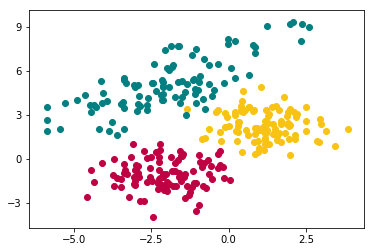

In [3]:
m1 = np.array((1, 2))
cov1 = [[1, 0], [0, 1]]
component1 = np.random.multivariate_normal(m1, cov1, 100)

m2 = np.array((-2, -1))
cov2 = [[1, 0], [0, 1]]
component2 = np.random.multivariate_normal(m2, cov2, 100)

m3 = np.array((-2, 5))
cov3 = [[2, 1], [3, 4]]
component3 = np.random.multivariate_normal(m3, cov3, 100)

colors = ['#f8c313',
          '#bf0143',
          '#027f80']

plt.scatter(component1[:, 0], component1[:, 1], color=colors[0])
plt.scatter(component2[:, 0], component2[:, 1], color=colors[1])
plt.scatter(component3[:, 0], component3[:, 1], color=colors[2])

data = np.vstack((component1, component2, component3))

samp_colors = []
for i, d in enumerate([component1, component2, component3]):
    for _ in range(d.shape[0]):
        samp_colors.append(colors[i])
        
samp_colors = np.array(samp_colors)

In [4]:
import matplotlib

In [5]:
matplotlib.colors.to_rgba('#f8c313')

(0.9725490196078431, 0.7647058823529411, 0.07450980392156863, 1.0)

In [6]:
np.where(samp_colors[:-1] != samp_colors[1:])

(array([ 99, 199]),)

In [7]:
len(data)

300

In [8]:
sampColors = {(0, 100): colors[0],
              (100, 200): colors[1],
              (200, 300): colors[2]}

In [9]:
samp_colors = []
for _ in range(0, 100):
    samp_colors.append(matplotlib.colors.to_rgba(colors[0]))
    
for _ in range(100, 200):
    samp_colors.append(matplotlib.colors.to_rgba(colors[1]))
    
for _ in range(200, 300):
    samp_colors.append(matplotlib.colors.to_rgba(colors[2]))

In [10]:
sampColors

{(0, 100): '#f8c313', (100, 200): '#bf0143', (200, 300): '#027f80'}

In [11]:
dataset = bnpy.data.XData(data)

In [12]:
merge_kwargs = dict(
    m_startLap=10,
    m_pair_ranking_procedure='total_size',
    m_pair_ranking_direction='descending',
    )

delete_kwargs = dict(
    d_startLap=10,
    d_nRefineSteps=50,
    )

In [13]:
help(bnpy.viz.PlotComps.plotCompsFromHModel)

Help on function plotCompsFromHModel in module bnpy.viz.PlotComps:

plotCompsFromHModel(hmodel, **kwargs)
    Show plot of learned clusters for provided model.



In [14]:
def show_clusters_over_time(
        task_output_path=None,
        query_laps=[0, 1, 2, 10, 20, None],
        nrows=2,
        samp_colors=(0.3, 0.3, 0.3)):
    '''
    '''
    colors=['gray', 'gray', 'gray', 'gray', 'gray']
    ncols = int(np.ceil(len(query_laps) // float(nrows)))
    fig_handle, ax_handle_list = pylab.subplots(
        figsize=(FIG_SIZE[0] * ncols, FIG_SIZE[1] * nrows),
        nrows=nrows, ncols=ncols, sharex=True, sharey=True, dpi=500)
    for plot_id, lap_val in enumerate(query_laps):
        cur_model, lap_val = bnpy.load_model_at_lap(task_output_path, lap_val)
        cur_ax_handle = ax_handle_list.flatten()[plot_id]
        bnpy.viz.PlotComps.plotCompsFromHModel(
            cur_model, 
            dataset=dataset, 
            ax_handle=cur_ax_handle,
            Colors=colors,
            samp_colors=samp_colors)
        cur_ax_handle.set_xlim([-4.5, 4.5])
        cur_ax_handle.set_title("Lap: %d" % lap_val)
        cur_ax_handle.set_xlabel("Arbitrary unit")
        cur_ax_handle.set_ylabel("Arbitrary unit")
    pylab.tight_layout()
    plt.savefig("../img/cluster-over-time.svg", format='svg', bbox_inches='tight')
    plt.savefig("../img/cluster-over-time.png", format='png', bbox_inches='tight', dpi=500)

In [15]:
b_trained_model, b_info_dict = bnpy.run(
    dataset, 'DPMixtureModel', 'Gauss', 'memoVB',
    output_path=('/tmp/StandardNormalK1/' +
        'trymoves-K=%d-gamma=%s-ECovMat=%s*eye-moves=birth,merge,shuffle/' % (
            5, 5.0, 1.0)),
    nLap=100, nTask=1, nBatch=1,
    gamma0=5.0, sF=1.0, ECovMat='eye',
    K=5, initname='randexamplesbydist',
    moves='birth,merge,shuffle')

Dataset Summary:
X Data
  total size: 300 units
  batch size: 300 units
  num. batches: 1
Allocation Model:  DP mixture with K=0. Concentration gamma0= 5.00
Obs. Data  Model:  Gaussian with full covariance.
Obs. Data  Prior:  Gauss-Wishart on mean and covar of each cluster
  E[  mean[k] ] = 
   [0. 0.] 
  E[ covar[k] ] = 
  [[1. 0.]
   [0. 1.]]
Initialization:
  initname = randexamplesbydist
  K = 5 (number of clusters)
  seed = 1607680
  elapsed_time: 0.0 sec
Learn Alg: memoVB | task  1/1 | alg. seed: 1607680 | data order seed: 8541952
task_output_path: /tmp/StandardNormalK1/trymoves-K=5-gamma=5.0-ECovMat=1.0*eye-moves=birth,merge,shuffle/1
MERGE @ lap 1.00: Disabled. Cannot plan merge on first lap. Need valid SS that represent whole dataset.
BIRTH @ lap 1.00 : Added 0 states. 0/5 succeeded. 4/5 failed eval phase. 1/5 failed build phase.
    1.000/100 after      1 sec. |    158.7 MiB | K    5 | loss  2.399075201e+00 |  
BIRTH @ lap 2.000 : None attempted. 0 past failures. 0 too small.

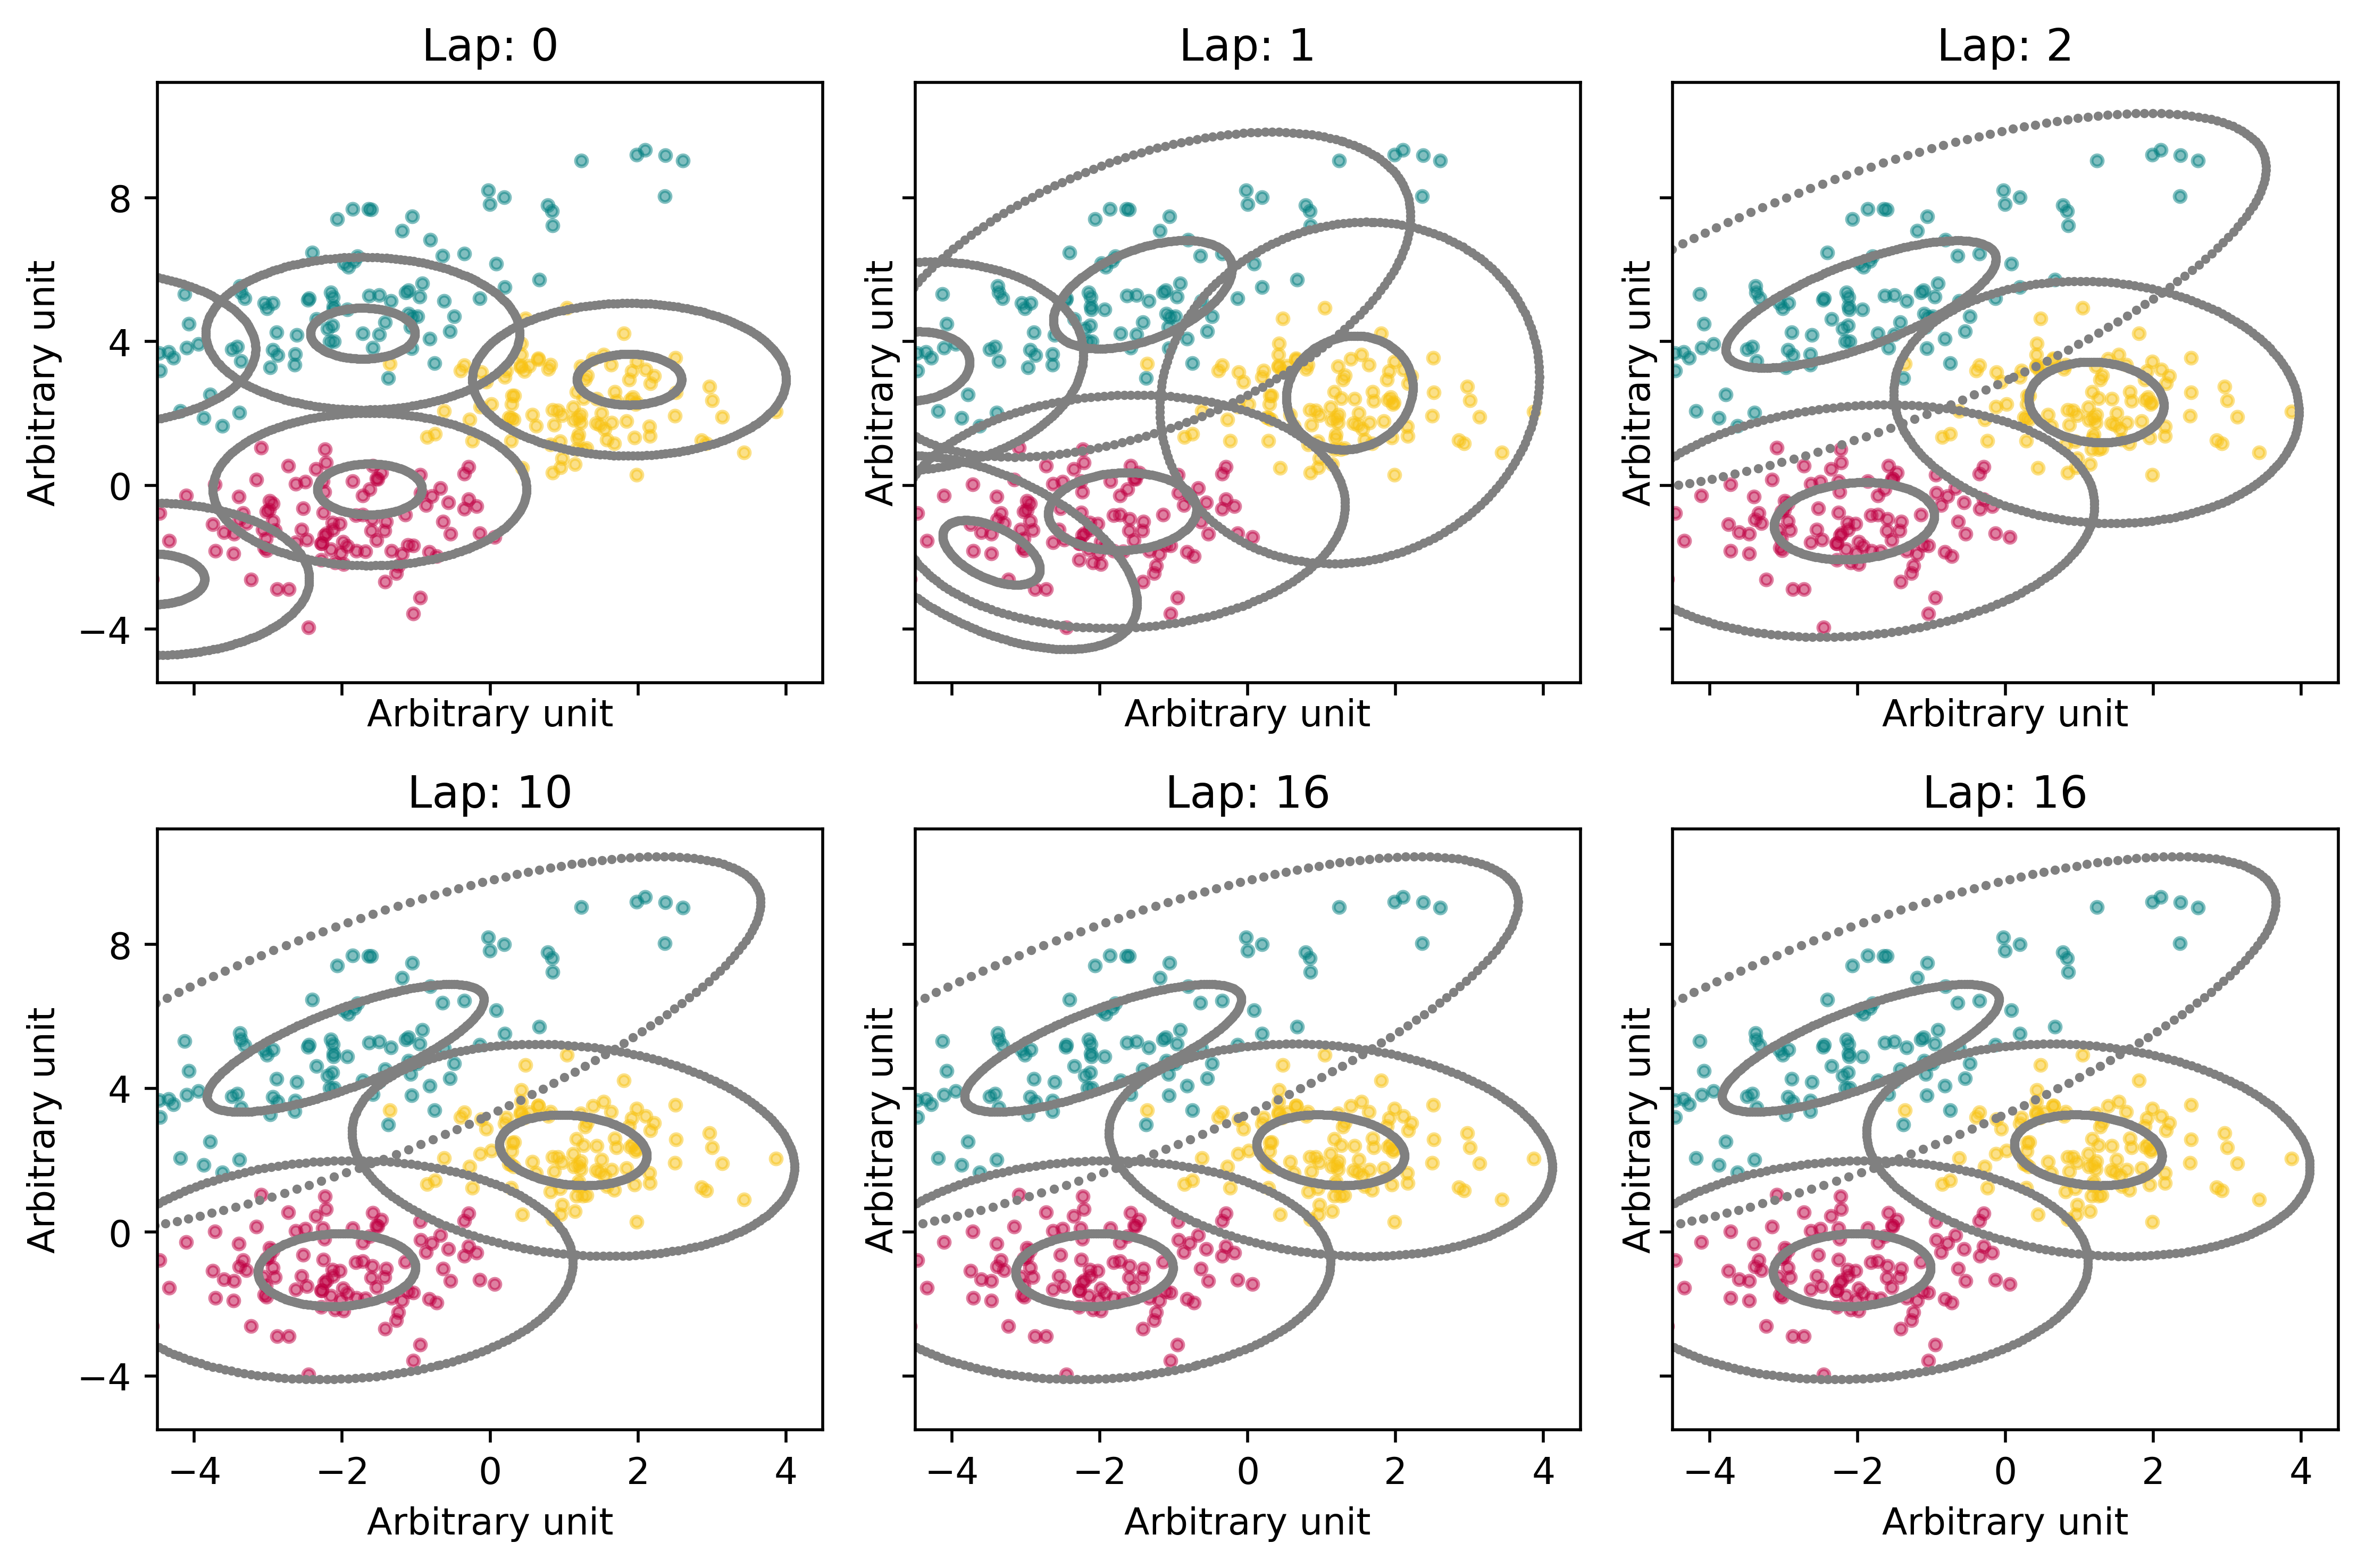

In [16]:
show_clusters_over_time(b_info_dict['task_output_path'], samp_colors=sampColors)